**EJERCICIO 1**


Posterior al contacto de una persona con la marca (ya sea que adquiera una motocicleta o asista a un taller de servicio) enviamos una encuesta para medir como fue la experiencia y qué tan satisfecho esta.

Para este fin se utiliza el NPS (Net Promoter Score) donde se consulta si el cliente nos recomendaría, de tal forma que suponemos que los clientes que respondan con calificaciones altas promocionaran nuestros productos entre otros clientes potenciales cercanos a ellos, mientras que aquellos con calificaciones bajas no están contentos y es poco probable que nos ayuden a aumentar la base de datos de clientes.

Según las calificaciones otorgadas, los clientes se pueden dividir en:

1. Detractores: Los usuarios que nos califican de 0 a 6.
2. Pasivos: Los usuarios que nos califican con 7 u 8.
3. Promotores: Los usuarios que nos califican con 9 o 10.

En esta encuesta además hay un campo en el que los clientes pueden escribirnos cómo se sienten con la marca y la experiencia recibida.

**Problema de negocio:**

Durante años ha venido ejecutándose el envío de la encuesta y la recolección de los datos asociados con la experiencia del cliente (en qué tienda se atendió, quién lo atendió, qué producto nos compró o llevó para reparación, si le toco volver o no por algún problema con el servicio técnico, etc.), además de los múltiples comentarios que nos hace el cliente en cada uno de sus contactos con la marca.

Nos interesa saber qué tan positiva es la percepción de la marca (no sólo medido en términos cuantitativos con el NPS, sino con los sentimientos asociados a los comentarios de los clientes) y si existe correlación con otros factores.

Por ejemplo: ¿que la experiencia sea o no positiva depende del tipo de moto que hayan comprado? ¿De quién los atienda? ¿De la tienda donde sea atendido? ¿Necesariamente un NPS alto implica un comentario positivo? ¿El NPS ha mejorado en el tiempo? ¿Hay algún factor o tema que haya mejorado o empeorado en el tiempo?
A partir del dataset “NPS.csv” realice un análisis de sentimientos y concluya acerca de sus hallazgos. 


En el siguiente notebook se encontrara un analisis de las variables que podrian explicar el comportamiento de nuestro target. 

*El informe lleva el siguiente orden:*

1. Analisis de correlacion
2. Analisis de la estadistica desriptiva de las variables - boxplots- histogramas - distribucion gausseana
3. Analisis de las instancias usando libreria de seaborn y plotly.express
4. Tratamiento de valores nulos
5. Imputacion de los datos
6. Encodear variables
7. Filas de la columna Comentario eliminadas
8. Analisis de procesamiento de lenguaje natural
9. Implementacion de procesamiento de lenguaje natural
10. Metricas de evaluacion
11. Implementacion de sistemas de recomendacion
12. Metricas de evaluacion
13. Random Forest usando variables numericas.
14. Metricas de evaluacion
15. Conclusiones

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 
import statistics 
from statistics import mode 

sns.set()

import gc

In [ ]:
data = pd.read_csv('/content/NPS.csv',sep=";", encoding='cp1252')  

In [ ]:
data

Tienda  NoPersonal  ModeloMoto          Nombre_Encuesta  \
0       432.0      1863.0        18.0     Experiencia Venta MC   
1       387.0      1443.0        60.0     Experiencia Venta MC   
2        71.0      1486.0        60.0     Experiencia Venta MC   
3        87.0      1466.0        67.0     Experiencia Venta MC   
4       208.0      1587.0         2.0     Experiencia Venta MC   
...       ...         ...         ...                      ...   
40157   102.0      1202.0        29.0  Experiencia Servicio MC   
40158   432.0         6.0         2.0  Experiencia Servicio MC   
40159   387.0      1333.0        70.0  Experiencia Servicio MC   
40160   134.0       460.0         8.0  Experiencia Servicio MC   
40161    84.0        -1.0         1.0  Experiencia Servicio MC   

      Fecha_Rpta_Encuesta  Valor_NPS  Tasa_Retorno Fecha_Venta_Servicio  \
0              30/05/2020         10           NaN           17/03/2020   
1              27/05/2020          9           NaN           11/05/2020   
2              27/05/2020          9           NaN           12/05/2020   
3              25/05/2020         10           NaN           11/05/2020   
4              22/05/2020         10           NaN           14/05/2020   
...                   ...        ...           ...                  ...   
40157           3/08/2021          9           1.0           12/07/2021   
40158           3/08/2021         10           1.0            3/07/2021   
40159           3/08/2021          9           1.0            8/07/2021   
40160           1/08/2021          8           1.0           14/07/2021   
40161           1/08/2021         10           1.0            1/07/2021   

                                              Comentario Motivo_Retorno  
0                                             excelente             NaN  
1                                   Buenas motocicletas             NaN  
2      Excelente marca,buen posicionamiento en el mer...            NaN  
3             Es la marca que es número uno del mercado             NaN  
4             Muy buena atención y excelente producto!!!            NaN  
...                                                  ...            ...  
40157                                Excelente servicio             NaN  
40158                    Excelente calidad del producto             NaN  
40159                                   Excelente marca             NaN  
40160  Disponibilidad de repuestos, ampliar el tiempo...            NaN  
40161  buena atención calidad en el servicio y en los...            NaN  

[40162 rows x 10 columns]

In [ ]:
pd.DataFrame(data["Nombre_Encuesta"].unique())

0
0     Experiencia Venta MC
1  Experiencia Servicio MC

In [ ]:
pd.DataFrame(data["Motivo_Retorno"].unique())

0
0                                                   NaN
1                  la cabrilla se estaba descolorizando
2                    Por La placa que aún no la tenían 
3                                                     .
4     Tenia un daño en la guaya de acelerador pero e...
...                                                 ...
1039  La moto sigue torcida, mal alineada, y se nota...
1040  Perdida de tornillos de la motocicleta ala hor...
1041  La persona encargada de recibir la moto como p...
1042                                 AJUSTE CARBURARDOR
1043           Garantía de una fuga en el refrigerante 

[1044 rows x 1 columns]

In [ ]:
data.Motivo_Retorno.isna().sum()

39108

In [ ]:
40162-39108

1054

In [ ]:
sorted(data.Valor_NPS.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
data.isna().sum()

Tienda                     54
NoPersonal                 54
ModeloMoto                 54
Nombre_Encuesta             0
Fecha_Rpta_Encuesta         0
Valor_NPS                   0
Tasa_Retorno            19145
Fecha_Venta_Servicio        0
Comentario                 73
Motivo_Retorno          39108
dtype: int64

<AxesSubplot:>

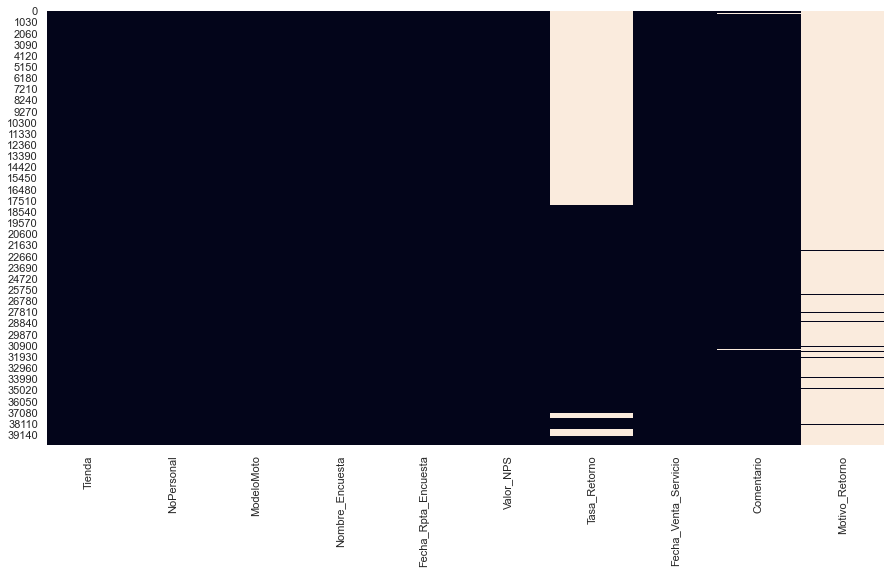

In [ ]:
# Identificamos los missing values visualmente
plt.figure(figsize=(15,8))
sns.heatmap(data.isnull(), cbar=False)

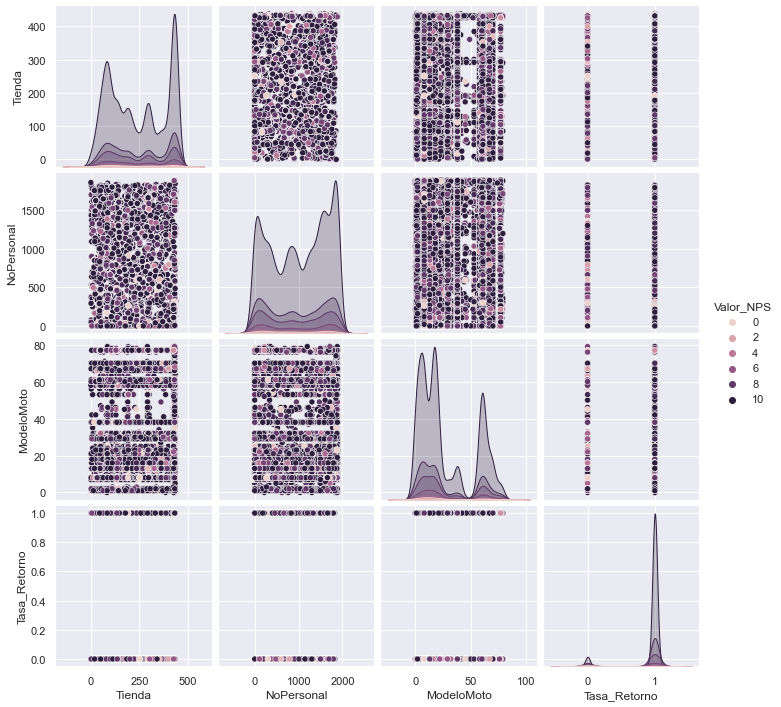

In [ ]:
sns.pairplot(data, hue="Valor_NPS")

**Poca correlacion entre las variables**

Un resultado de 0 significa que no hay correlación, es decir, el comportamiento de una variable no se relaciona con el comportamiento de la otra variable.

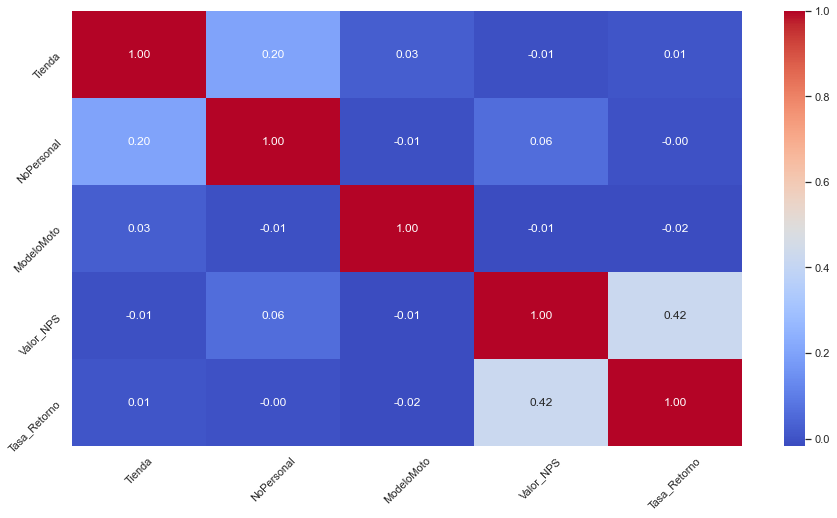

In [ ]:
corr = data.corr()

plt.figure(figsize = (15,8))
sns.heatmap(corr, annot=True, fmt = '.2f', cmap='coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

## Realizamos un plot de las variables para analilzarlas 

C:\Users\pulzara\miniconda3\envs\sp3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frecuencia por bins')

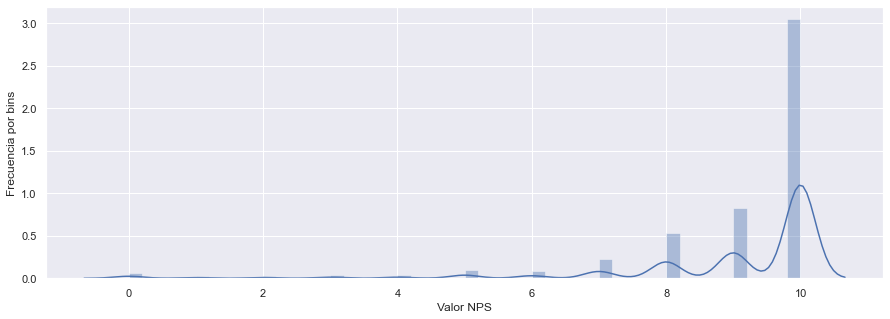

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(data.Valor_NPS)
ax.set_xlabel('Valor NPS')
ax.set_ylabel('Frecuencia por bins')

**Observamos variables discretas,donde la mayor frecuencia de valoracion la tiene la mas alta calificacion., y son pocas las personas que no recomiendarian a la emrpesa.**

C:\Users\pulzara\miniconda3\envs\sp3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frecuencia por bins')

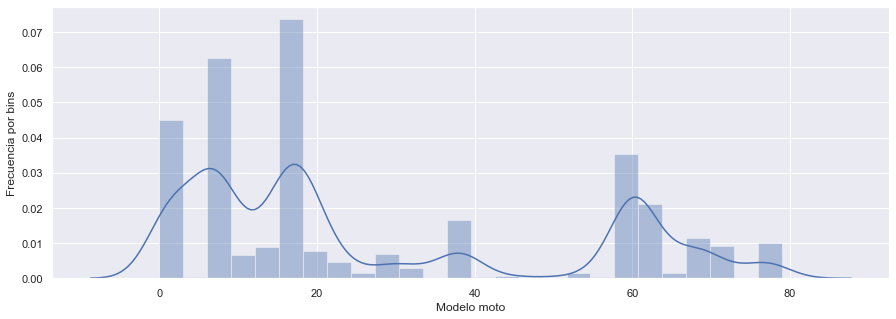

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(data.ModeloMoto)
ax.set_xlabel('Modelo moto')
ax.set_ylabel('Frecuencia por bins')

El Id de motocicleta vendida o atendida, presenta mayor frecuencia entre 0-20.

C:\Users\pulzara\miniconda3\envs\sp3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frecuencia por bins')

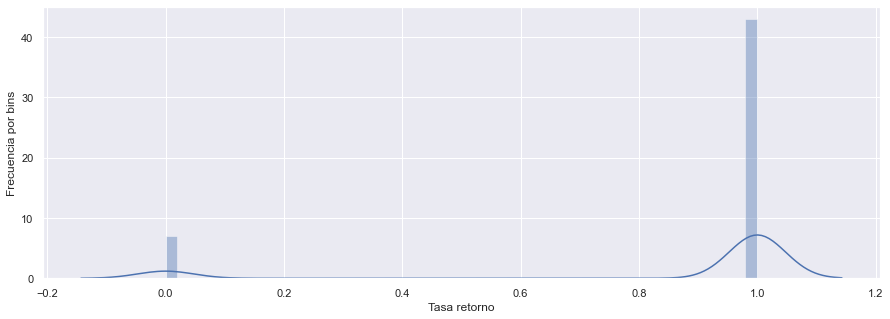

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(data.Tasa_Retorno)
ax.set_xlabel('Tasa retorno')
ax.set_ylabel('Frecuencia por bins')

Se puede evidenciar que muchas veces las personas tuvieron que regresar al taller. En caso de tener una moto y pertenecer a la clase de servicio tenico

C:\Users\pulzara\miniconda3\envs\sp3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frecuencia por bins')

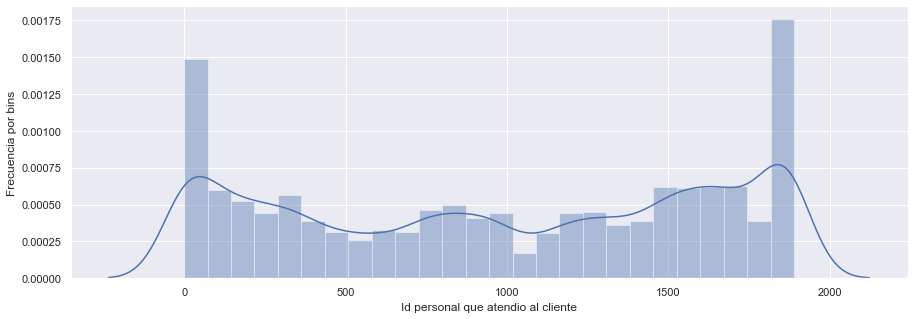

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(data.NoPersonal)
ax.set_xlabel('Id personal que atendio al cliente')
ax.set_ylabel('Frecuencia por bins')

*En este caso se destacan los trabajadores con Id entre 0-10 y 1800 y 2000*

## distribucion 

C:\Users\pulzara\miniconda3\envs\sp3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Valor_NPS'>

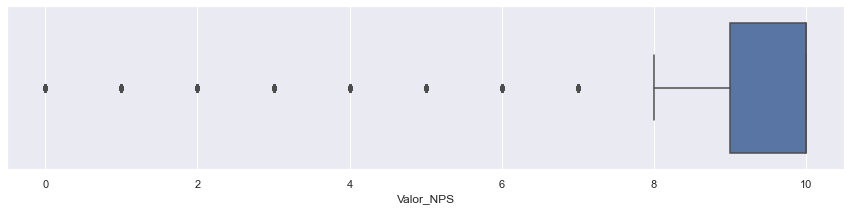

In [ ]:
plt.subplots(figsize=(15,3))
sns.boxplot(data.Valor_NPS)

Observamos una media en 10 de calificaciones positivas

C:\Users\pulzara\miniconda3\envs\sp3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ModeloMoto'>

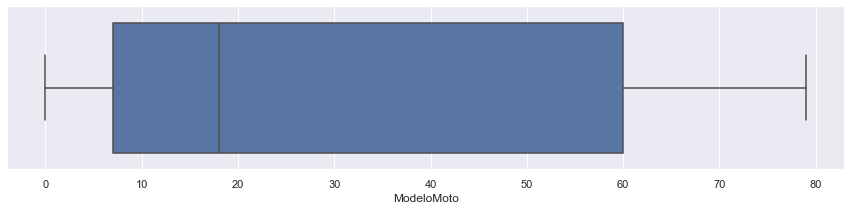

In [ ]:
plt.subplots(figsize=(15,3))
sns.boxplot(data.ModeloMoto)

Se observa una media corrida hacia la izquierda, con una media en 18 aproximadamente, que representa el modelo de moto que mas ha asistido al taller

C:\Users\pulzara\miniconda3\envs\sp3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NoPersonal'>

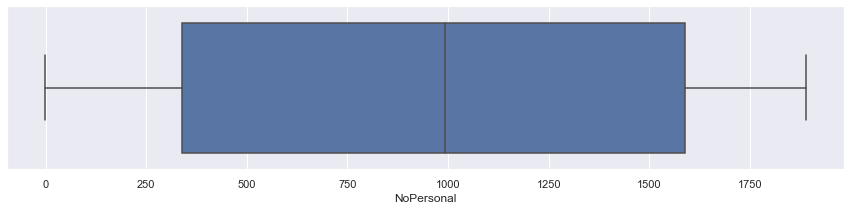

In [ ]:
plt.subplots(figsize=(15,3))
sns.boxplot(data.NoPersonal)

Podemos observar que la media se encunetra en 1000, de la persona que mas a atendido clientes

C:\Users\pulzara\miniconda3\envs\sp3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Tienda'>

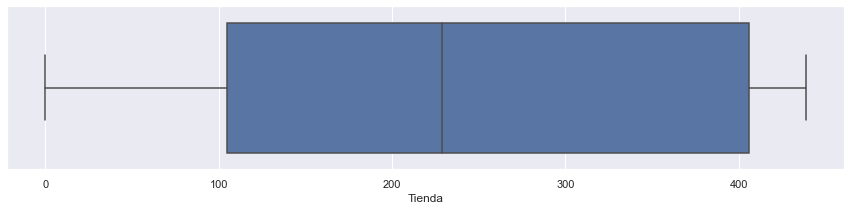

In [ ]:
plt.subplots(figsize=(15,3))
sns.boxplot(data.Tienda) 

### Analisis 

In [ ]:
data

Tienda  NoPersonal  ModeloMoto          Nombre_Encuesta  \
0       432.0      1863.0        18.0     Experiencia Venta MC   
1       387.0      1443.0        60.0     Experiencia Venta MC   
2        71.0      1486.0        60.0     Experiencia Venta MC   
3        87.0      1466.0        67.0     Experiencia Venta MC   
4       208.0      1587.0         2.0     Experiencia Venta MC   
...       ...         ...         ...                      ...   
40157   102.0      1202.0        29.0  Experiencia Servicio MC   
40158   432.0         6.0         2.0  Experiencia Servicio MC   
40159   387.0      1333.0        70.0  Experiencia Servicio MC   
40160   134.0       460.0         8.0  Experiencia Servicio MC   
40161    84.0        -1.0         1.0  Experiencia Servicio MC   

      Fecha_Rpta_Encuesta  Valor_NPS  Tasa_Retorno Fecha_Venta_Servicio  \
0              30/05/2020         10           NaN           17/03/2020   
1              27/05/2020          9           NaN           11/05/2020   
2              27/05/2020          9           NaN           12/05/2020   
3              25/05/2020         10           NaN           11/05/2020   
4              22/05/2020         10           NaN           14/05/2020   
...                   ...        ...           ...                  ...   
40157           3/08/2021          9           1.0           12/07/2021   
40158           3/08/2021         10           1.0            3/07/2021   
40159           3/08/2021          9           1.0            8/07/2021   
40160           1/08/2021          8           1.0           14/07/2021   
40161           1/08/2021         10           1.0            1/07/2021   

                                              Comentario Motivo_Retorno  
0                                             excelente             NaN  
1                                   Buenas motocicletas             NaN  
2      Excelente marca,buen posicionamiento en el mer...            NaN  
3             Es la marca que es número uno del mercado             NaN  
4             Muy buena atención y excelente producto!!!            NaN  
...                                                  ...            ...  
40157                                Excelente servicio             NaN  
40158                    Excelente calidad del producto             NaN  
40159                                   Excelente marca             NaN  
40160  Disponibilidad de repuestos, ampliar el tiempo...            NaN  
40161  buena atención calidad en el servicio y en los...            NaN  

[40162 rows x 10 columns]

In [ ]:
ev = data[data["Nombre_Encuesta"] == "Experiencia Venta MC"]
ev2 = data[data["Nombre_Encuesta"] == "Experiencia Servicio MC"]

**Vamos a observar como se comportan las variables de manera independiente de su nombre de encuesta. Es decir si pertenece a la clase Experiencia en Venta o Experiencia en Servicio.**

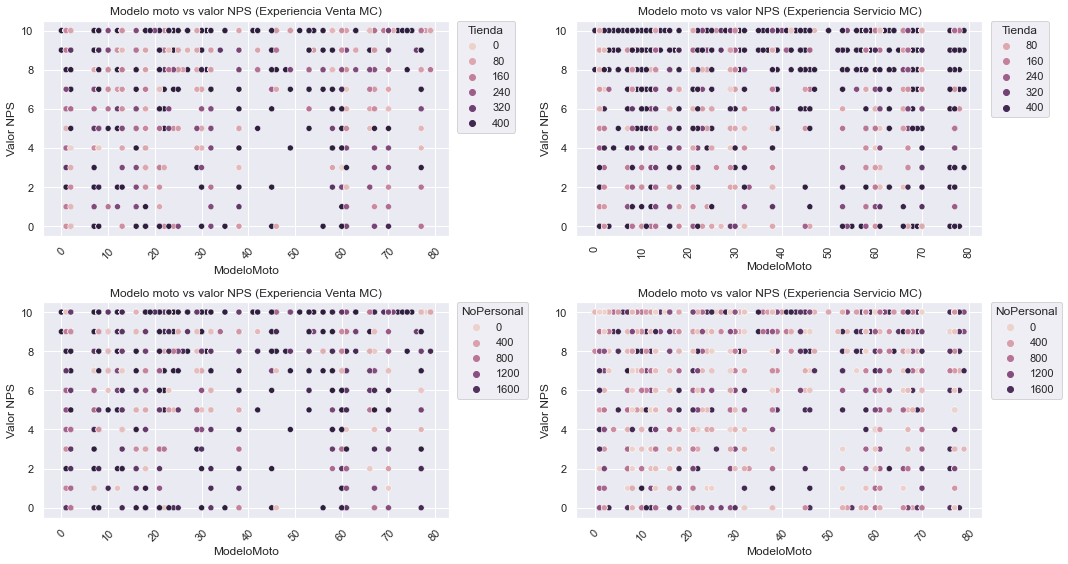

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.scatterplot(data = ev,x='ModeloMoto',y='Valor_NPS', hue='Tienda')
plt.xticks(rotation=45)
plt.title('Modelo moto vs valor NPS (Experiencia Venta MC)')
plt.xlabel('ModeloMoto')
plt.ylabel('Valor NPS')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Tienda')

plt.subplot(2,2,2)   
sns.scatterplot(data = ev2,x='ModeloMoto',y='Valor_NPS', hue='Tienda') 
plt.xticks(rotation=90)
plt.title('Modelo moto vs valor NPS (Experiencia Servicio MC)')
plt.xlabel('ModeloMoto')
plt.ylabel('Valor NPS')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Tienda')

plt.subplot(2,2,3)
sns.scatterplot(data = ev,x='ModeloMoto',y='Valor_NPS', hue='NoPersonal')
plt.xticks(rotation=45)
plt.title('Modelo moto vs valor NPS (Experiencia Venta MC)')
plt.xlabel('ModeloMoto')
plt.ylabel('Valor NPS')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='NoPersonal')


plt.subplot(2,2,4) 
sns.scatterplot(data = ev2,x='ModeloMoto',y='Valor_NPS', hue='NoPersonal')
plt.xticks(rotation=45)
plt.title('Modelo moto vs valor NPS (Experiencia Servicio MC)')
plt.xlabel('ModeloMoto')
plt.ylabel('Valor NPS')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='NoPersonal')


plt.tight_layout()

En el 1 scatterplot con hue en tienda Experiencia venta, se evidencian altos valores de NPS para tiendas con id entre 240 y 400. Mientras que para las tiendas con menor id hay una tienden a tener un valor menor de NPS. La distribucion de puntos con altos valores parecen ser bastantes en comparacion con los valores mas bajos de NPS. Es posible determinar que hay modelos de motos que no tienen puntajes bajos, los cuales se encuentran alrededor de 30 y y 60 ModeloMoto, que parecen ser las mismas motos que no regulan mucho el taller de servicio o que califican con una muy buena experiencia. Los modelos de motos con valores exrtemos, posiblemente frecuenten mas los servicios de MC. 

En el grafico 3, Es posible observar como a bajos valores se encuentran mas frecuencias de puntos mas oscuros de NoPersonal, y mas claros a mayores valores de NPS. Mientras que en el grafico 4 de (Experiencia de servicio MC - NoPersonal) se observa todo lo contrario. Mayores cantidad de valores altos para el personal con numero mas bajo.

En el caso de la grafica 1, las ventas dependeran mas de las tiendas con valores de id mas altos.
En el caso de la grafica 2, el servicio dependera mas de las tiendas con valores de id altos. 
En el caso de la grafica 3, las ventas dependeran mas del personal con valores altos.
En el caso de la grafica 4, el servicio dependera mas del numero del personal com valores de id mas bajos.

## Valores nulls

**Como son pocos datos nulos en las variables Tienda, NoPersonal, ModeloMoto. Utilizaremos la moda para reemplazar los datos faltantes.**

In [ ]:
data1 = data.copy()

In [ ]:
# Imputamos las variables con la moda
data1['Tienda'].fillna(data1['Tienda'].mode()[0], inplace=True)
print("Valores perdidos en tienda: " + 
      str(data1['Tienda'].isnull().sum()))

# Imputamos las variables con la moda
data1['NoPersonal'].fillna(data1['NoPersonal'].mode()[0], inplace=True)
print("Valores perdidos en Nopersonal: " + 
      str(data1['NoPersonal'].isnull().sum()))

# Imputamos las variables con la moda
data1['ModeloMoto'].fillna(data1['ModeloMoto'].mode()[0], inplace=True)
print("Valores perdidos en Modelo moto: " + 
      str(data1['ModeloMoto'].isnull().sum()))

Valores perdidos en tienda: 0
Valores perdidos en Nopersonal: 0
Valores perdidos en Modelo moto: 0


In [ ]:
data1 = data1.dropna(subset=['Comentario'])

In [ ]:
data1.isna().sum()

Tienda                      0
NoPersonal                  0
ModeloMoto                  0
Nombre_Encuesta             0
Fecha_Rpta_Encuesta         0
Valor_NPS                   0
Tasa_Retorno            19120
Fecha_Venta_Servicio        0
Comentario                  0
Motivo_Retorno          39037
dtype: int64

## encoders
**La variable Nombre_Encuesta la convertiremos en una variable binaria.**

In [ ]:
dic_Nombre_Encuesta = {"Experiencia Venta MC":0, "Experiencia Servicio MC":1}

In [ ]:
data1['Nombre_Encuesta_bin'] = data1['Nombre_Encuesta'].map(dic_Nombre_Encuesta)

In [ ]:
data1.Nombre_Encuesta_bin.unique()

array([0, 1], dtype=int64)

In [ ]:
data1.Nombre_Encuesta_bin.isnull().sum()

0

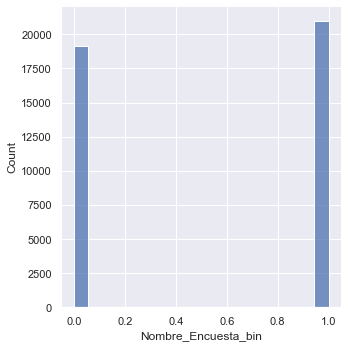

In [ ]:
sns.displot(data1.Nombre_Encuesta_bin)

*Observamos que la distribucion de cada dato es muy parecida en frecuencia.*

In [ ]:
data1.head()

Tienda  NoPersonal  ModeloMoto       Nombre_Encuesta Fecha_Rpta_Encuesta  \
0   432.0      1863.0        18.0  Experiencia Venta MC          30/05/2020   
1   387.0      1443.0        60.0  Experiencia Venta MC          27/05/2020   
2    71.0      1486.0        60.0  Experiencia Venta MC          27/05/2020   
3    87.0      1466.0        67.0  Experiencia Venta MC          25/05/2020   
4   208.0      1587.0         2.0  Experiencia Venta MC          22/05/2020   

   Valor_NPS  Tasa_Retorno Fecha_Venta_Servicio  \
0         10           NaN           17/03/2020   
1          9           NaN           11/05/2020   
2          9           NaN           12/05/2020   
3         10           NaN           11/05/2020   
4         10           NaN           14/05/2020   

                                          Comentario Motivo_Retorno  \
0                                         excelente             NaN   
1                               Buenas motocicletas             NaN   
2  Excelente marca,buen posicionamiento en el mer...            NaN   
3         Es la marca que es número uno del mercado             NaN   
4         Muy buena atención y excelente producto!!!            NaN   

   Nombre_Encuesta_bin  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [ ]:
data1.drop(columns={"Nombre_Encuesta"},inplace=True)

In [ ]:
data1

Tienda  NoPersonal  ModeloMoto Fecha_Rpta_Encuesta  Valor_NPS  \
0       432.0      1863.0        18.0          30/05/2020         10   
1       387.0      1443.0        60.0          27/05/2020          9   
2        71.0      1486.0        60.0          27/05/2020          9   
3        87.0      1466.0        67.0          25/05/2020         10   
4       208.0      1587.0         2.0          22/05/2020         10   
...       ...         ...         ...                 ...        ...   
40157   102.0      1202.0        29.0           3/08/2021          9   
40158   432.0         6.0         2.0           3/08/2021         10   
40159   387.0      1333.0        70.0           3/08/2021          9   
40160   134.0       460.0         8.0           1/08/2021          8   
40161    84.0        -1.0         1.0           1/08/2021         10   

       Tasa_Retorno Fecha_Venta_Servicio  \
0               NaN           17/03/2020   
1               NaN           11/05/2020   
2               NaN           12/05/2020   
3               NaN           11/05/2020   
4               NaN           14/05/2020   
...             ...                  ...   
40157           1.0           12/07/2021   
40158           1.0            3/07/2021   
40159           1.0            8/07/2021   
40160           1.0           14/07/2021   
40161           1.0            1/07/2021   

                                              Comentario Motivo_Retorno  \
0                                             excelente             NaN   
1                                   Buenas motocicletas             NaN   
2      Excelente marca,buen posicionamiento en el mer...            NaN   
3             Es la marca que es número uno del mercado             NaN   
4             Muy buena atención y excelente producto!!!            NaN   
...                                                  ...            ...   
40157                                Excelente servicio             NaN   
40158                    Excelente calidad del producto             NaN   
40159                                   Excelente marca             NaN   
40160  Disponibilidad de repuestos, ampliar el tiempo...            NaN   
40161  buena atención calidad en el servicio y en los...            NaN   

       Nombre_Encuesta_bin  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
40157                    1  
40158                    1  
40159                    1  
40160                    1  
40161                    1  

[40089 rows x 10 columns]

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40089 entries, 0 to 40161
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tienda                40089 non-null  float64
 1   NoPersonal            40089 non-null  float64
 2   ModeloMoto            40089 non-null  float64
 3   Fecha_Rpta_Encuesta   40089 non-null  object 
 4   Valor_NPS             40089 non-null  int64  
 5   Tasa_Retorno          20969 non-null  float64
 6   Fecha_Venta_Servicio  40089 non-null  object 
 7   Comentario            40089 non-null  object 
 8   Motivo_Retorno        1052 non-null   object 
 9   Nombre_Encuesta_bin   40089 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 3.4+ MB


## datetime

In [ ]:
data2=data1.copy()

In [ ]:
data2["Fecha_Rpta_Encuesta"] = pd.to_datetime(data2.Fecha_Rpta_Encuesta)

In [ ]:
data2["Fecha_Venta_Servicio"] = pd.to_datetime(data2.Fecha_Venta_Servicio)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40089 entries, 0 to 40161
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Tienda                40089 non-null  float64       
 1   NoPersonal            40089 non-null  float64       
 2   ModeloMoto            40089 non-null  float64       
 3   Fecha_Rpta_Encuesta   40089 non-null  datetime64[ns]
 4   Valor_NPS             40089 non-null  int64         
 5   Tasa_Retorno          20969 non-null  float64       
 6   Fecha_Venta_Servicio  40089 non-null  datetime64[ns]
 7   Comentario            40089 non-null  object        
 8   Motivo_Retorno        1052 non-null   object        
 9   Nombre_Encuesta_bin   40089 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(2)
memory usage: 3.4+ MB


In [ ]:
data.Comentario.unique()

array(['excelente ', 'Buenas motocicletas ',
       'Excelente marca,buen posicionamiento en el mercado cuando se quiere vender y mejorar modelo',
       ..., ' Excelente calidad del producto ',
       'Disponibilidad de repuestos, ampliar el tiempo de atención a fines de semana.',
       'buena atención calidad en el servicio y en los productos, son una marca reconocida mundial mente, '],
      dtype=object)

### Valores a eliminar dentro de la varibale Comentario

In [ ]:
#data3 = data2.loc[~data2["Comentario"].isin(borrar)] 

In [ ]:
import re
from unicodedata import normalize

new = []

# -> NFD y eliminar diacríticos
for i in data2.Comentario:
    s = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", str(i)), 0, re.I
        )

# -> NFC
    s = normalize( 'NFC', s)
    new.append(s)

pd.DataFrame(new) 

0
0                                             excelente 
1                                   Buenas motocicletas 
2      Excelente marca,buen posicionamiento en el mer...
3             Es la marca que es numero uno del mercado 
4             Muy buena atencion y excelente producto!!!
...                                                  ...
40084                                Excelente servicio 
40085                    Excelente calidad del producto 
40086                                   Excelente marca 
40087  Disponibilidad de repuestos, ampliar el tiempo...
40088  buena atencion calidad en el servicio y en los...

[40089 rows x 1 columns]

In [ ]:
#nueva = []
#for i in data2.Comentario:
#    new_string = re.sub(r"[^a-zA-Z0-9]","",str(i)) 
#    nueva.append(new_string)
#pd.DataFrame(nueva)

In [ ]:
data2['Comentario'] = new 

In [ ]:
data2.Comentario = data2.Comentario.str.lower() 

In [ ]:
pd.DataFrame(data2.Comentario.unique()).tail(40)

0
26087  porque son motos de excelente calidad y durabi...
26088                     mala pintura . cala pies malos
26089         la confiabilidad en la marca y el servicio
26090  calidad y cumplimiento buena atencion y el res...
26091  como lo dije anterior mente los repuestos much...
26092  por que el freno trasero se deterioro y me par...
26093                                          en costo 
26094                            calidad reconocimiento 
26095                             calidad en maquinaria 
26096                              el servio muy regular
26097  mas disponibilidad de los repuestos y que los ...
26098  verificar bien antes de entregar, puede que es...
26099                            yamaha excelentes motos
26100  es la mejor marca y sus productos y servicios ...
26101  no parecen profesionales y menos parece que es...
26102               lo.anterio dicho en los comentarios 
26103   calidad del producto y amabilidad en la atencion
26104           buena calidad consumen poco combustible 
26105  que es la mejor marca con sus mejores motos y ...
26106                     que tengan financiacion propia
26107          mas respaldo hacia el cliente de la marca
26108                 comunicacion. y tiempo de entrega 
26109  la excelente atencion, buena comunicacion y mu...
26110  mas tiempo en la explicacion de los arreglos r...
26111          por su  excelente calidad y buen servicio
26112  mas preparacion de los mecanicos en aspectos g...
26113                   por marca, garantia, estabilidad
26114                     servicio oportuno y de calidad
26115                                  mayor oportunidad
26116       excelentes maquinas y la atencion muy buena 
26117                    que el personal sea mas atento 
26118             el tema de calentamiento de las motos 
26119  que entreguen la moto a la hora que dicen y no...
26120                               mayor disponibilidad
26121  que presten mas atencion a las solicitudes de ...
26122  es una exelente marca, y muy buenas motociclet...
26123                                                 jj
26124                    excelente calidad del producto 
26125  disponibilidad de repuestos, ampliar el tiempo...
26126  buena atencion calidad en el servicio y en los...

In [ ]:
df = data2.sort_values(by = "Fecha_Rpta_Encuesta", ascending=True )

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(df, x="Fecha_Rpta_Encuesta", y="Valor_NPS") 
 
fig.update_layout(
    title = {
        'text' : 'Curva de tendencia Fecha de respuesta vs valor NPS', 'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'
    })
fig.show() 

No es posible realizar un analisis en el tiempo. Por lo tanto crearemos una nueva varibale que reste [fecha Rpta _encueta - la fecha de venta _servicio (compra la moto o asiste a servio)]

Asi podremos analizar el tiempo de demora y la satisfaccion del cliente

In [ ]:
df["Tiempo encuesta (days)"] = df["Fecha_Rpta_Encuesta"] - df["Fecha_Venta_Servicio"]

In [ ]:
df["Tiempo encuesta (days)"] = df["Tiempo encuesta (days)"].dt.days

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df["Tiempo encuesta (days)"] = df["Tiempo encuesta (days)"].abs()

Tiempo encueta dias, sera en valor absouto asumiendo que hay un solo tiempo de espera entre la encuesta y el servicio. En este caso no importara cual fue el primero, solo interesa conocer el tiempo.

In [ ]:
df

Tienda  NoPersonal  ModeloMoto Fecha_Rpta_Encuesta  Valor_NPS  \
0       432.0      1866.0        38.0          2019-01-03          8   
1       107.0      1768.0        60.0          2019-01-03          6   
2       129.0      1619.0        16.0          2019-01-03          6   
3       434.0      1845.0         1.0          2019-01-04         10   
4        90.0       621.0        67.0          2019-01-04          8   
...       ...         ...         ...                 ...        ...   
40084    39.0      1717.0        13.0          2021-12-09          9   
40085   385.0       746.0        53.0          2021-12-09         10   
40086   235.0       202.0        13.0          2021-12-09          8   
40087   175.0        -1.0        29.0          2021-12-09         10   
40088    63.0      1319.0         8.0          2021-12-09         10   

       Tasa_Retorno Fecha_Venta_Servicio  \
0               NaN           2019-01-15   
1               1.0           2019-01-14   
2               1.0           2019-01-24   
3               NaN           2019-09-02   
4               NaN           2019-12-02   
...             ...                  ...   
40084           NaN           2021-08-27   
40085           NaN           2021-08-25   
40086           NaN           2021-08-28   
40087           1.0           2021-08-19   
40088           NaN           2021-08-20   

                                              Comentario Motivo_Retorno  \
0      no todo es perfecto hay detalles que tienen qu...            NaN   
1      la moto son buenas, pero los servicios pos-ven...            NaN   
2      la falta de confiabilidad, y un daño muy rapid...            NaN   
3                         excelente atencion y asesoria             NaN   
4               mas accesorio para incentivar al cliente            NaN   
...                                                  ...            ...   
40084  la marca es una de las mejores, no se que tal ...            NaN   
40085                   la mejor maquina y los repuesto             NaN   
40086  informacion clara sobre la llegada de nuevos m...            NaN   
40087  excelente servicio . y lo excelente que salen ...            NaN   
40088  la amabilidad de sus funcionarios y demas pers...            NaN   

       Nombre_Encuesta_bin  Tiempo encuesta (days)  
0                        0                      12  
1                        1                      11  
2                        1                      21  
3                        0                     241  
4                        0                     332  
...                    ...                     ...  
40084                    0                     104  
40085                    0                     106  
40086                    0                     103  
40087                    1                     112  
40088                    0                     111  

[40089 rows x 11 columns]

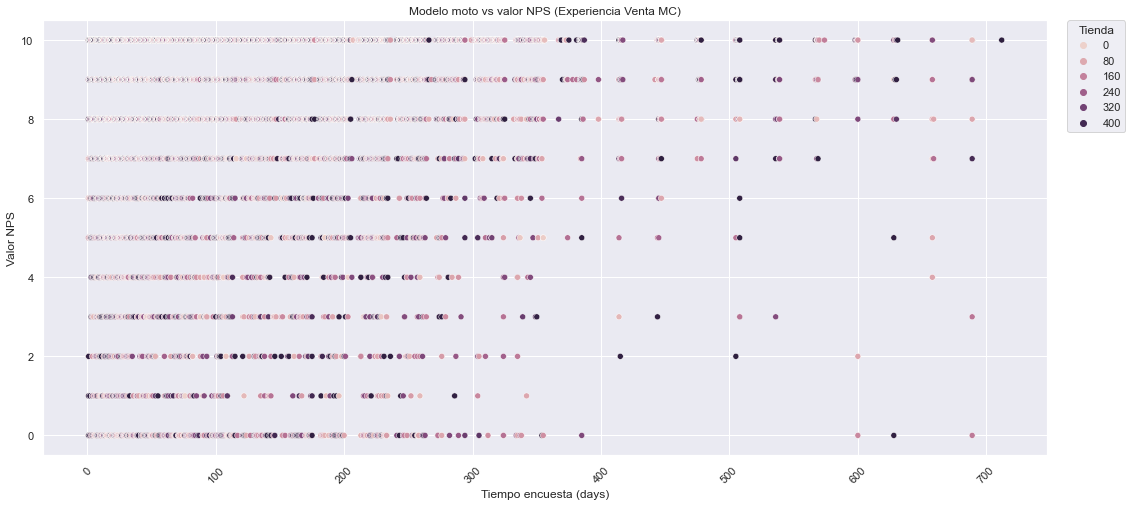

In [ ]:
s = df.sort_values(by = "Tiempo encuesta (days)", ascending=True) 

plt.figure(figsize=(18,8))
sns.scatterplot(data = s,x='Tiempo encuesta (days)',y='Valor_NPS', hue='Tienda') 
plt.xticks(rotation=45)
plt.title('Modelo moto vs valor NPS (Experiencia Venta MC)')
plt.xlabel('Tiempo encuesta (days)')
plt.ylabel('Valor NPS')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Tienda')

Se puede observar que las encuentas en el menor tiempo se encuentran dentro de las tiendas con id bajos y altos valores de NPS. Mientras que a medida que pasa el tiempo, son pocas las calificaciones que se realizan de manera positiva, y por lo general tenden a ser valores de tiendas de colos mas oscuro. Sin embargo es dificil dar una conclusion veras de esto.

## Analisis de procesamiento de lenguaje natural

**Observaremos los comentatarios y en que cantidad aparecen**

In [ ]:
pd.DataFrame(df.Comentario).head(40)

Comentario
0   no todo es perfecto hay detalles que tienen qu...
1   la moto son buenas, pero los servicios pos-ven...
2   la falta de confiabilidad, y un daño muy rapid...
3                      excelente atencion y asesoria 
4            mas accesorio para incentivar al cliente
5                                  no tengo respuesta
6           son los mejores, la atencion es excelente
7                                                   t
8   excelente atencion y oportunidad en la prestac...
9                                      excelente moto
10             muy buena marca en motores y garantia 
11                                    excelente marca
12                         disponibilidad de producto
13      mejorar la atencion en la revision periodica 
14                              calidad del producto 
15                                   excelente marca 
16   por ser una marca muy fina y buenas motocicletas
17                                muy bien excelente 
18  prestaron un buen servicio tanto con el produc...
19                                     buena maquinas
20  es una de las mejores marcas en cuanto a calid...
21                                            calidad
22  es una buena marca y sus repuestos no son tan ...
23                      excelente calidad y diseño!!!
24  la calidad de los vehiculos y sus mantenimientos 
25                                 precio y calidad. 
26  marka y el prestigio de la empresa se esta com...
27                                      buenas motos 
28  el servicio postventa para garantias y demas d...
29                                                  .
30                            los tiempos de entrega 
31  calidad de las maquinas, precio de las mismas ...
32  la experiencia, la calidad, la garantia y el r...
33                        mejorar tiempos de entrega 
34                           asesores mas capacitados
35                     el diseño q sea mas deportiva 
36            muy buena marca y un excelente respaldo
37                             es una marca excelente
38  calidad, facilidades de financiamiento a bajas...
39                     buena atencion y buena calidad

In [ ]:
cm = pd.DataFrame(df.Comentario.value_counts()).head(40)

In [ ]:
cm.sort_values(by ="Comentario", ascending=False)

Comentario
calidad                     1010
.                            486
calidad                      463
0                            419
excelente servicio           369
excelente servicio           326
excelente marca              311
buen servicio                262
buena marca                  226
excelente marca              213
buen servicio                211
excelente calidad            155
calidad y servicio           145
muy buena marca              142
buena marca                  117
excelente                    115
buena calidad                111
excelente calidad            108
calidad del producto         101
excelente producto            97
nada                          95
excelente                     95
ok                            91
.                             90
buena atencion                88
muy buen servicio             85
buena calidad                 83
buena atencion                82
excelente atencion            81
muy buena marca               81
la calidad                    78
marca                         73
la calidad                    67
excelente atencion            67
ninguno                       65
la marca                      63
excelente producto            62
muy buen servicio             61
calidad y servicio            58
excelente moto                56

In [ ]:
fig = px.bar(cm, x = cm.index, y = "Comentario")
fig.show()

**EL segundo valor mas alto que no tiene nombre ya viene por defecto en el dataset asi.**

**Es posible determinar la cantidad de comentarios que tenemos en la variable. Es importante determinar que son mas los comentarios posituvos que negativos.**

*Los comentarios tipo {0,.,Ninguno, nada} Pueden atribuirse a un mal servicio o que simplemente no tienen comentarios y no quedaron conformes o que les dio igual lo que paso y la atencion.*

In [ ]:
df.Comentario 

0        no todo es perfecto hay detalles que tienen qu...
1        la moto son buenas, pero los servicios pos-ven...
2        la falta de confiabilidad, y un daño muy rapid...
3                           excelente atencion y asesoria 
4                 mas accesorio para incentivar al cliente
                               ...                        
40084    la marca es una de las mejores, no se que tal ...
40085                     la mejor maquina y los repuesto 
40086    informacion clara sobre la llegada de nuevos m...
40087    excelente servicio . y lo excelente que salen ...
40088    la amabilidad de sus funcionarios y demas pers...
Name: Comentario, Length: 40089, dtype: object

In [ ]:
mas_comunes = [item for t in Counter(" ".join(df.Comentario).split()).most_common(100) for item in t]
mas_comunes = [x for x in mas_comunes if not isinstance(x, int)]
mas_comunes[0:10]

['la',
 'y',
 'de',
 'calidad',
 'excelente',
 'marca',
 'en',
 'que',
 'muy',
 'servicio']

In [ ]:
def letter(word_list, k):
    words = []
    for word in word_list:
        if len(word)>k:
            words.append(word)
    return words

letter(mas_comunes, 4)

['calidad',
 'excelente',
 'marca',
 'servicio',
 'buena',
 'atencion',
 'motos',
 'yamaha',
 'producto',
 'mejor',
 'productos',
 'motocicletas',
 'buenas',
 'cliente',
 'excelentes',
 'respaldo',
 'motocicleta',
 'entrega',
 'repuestos',
 'exelente',
 'garantia',
 'calidad,',
 'disponibilidad',
 'mejores',
 'buenos',
 'marca,',
 'mejorar',
 'porque',
 'siempre',
 'tenido',
 'compra',
 'servicio,',
 'tiene',
 'momento',
 'precios',
 'tiempo',
 'experiencia',
 'venta',
 'maquina',
 'tecnico',
 'atencion,',
 'parte',
 'reconocida',
 'todos',
 'cuando',
 'amabilidad',
 'servicios',
 'bueno',
 'tienen',
 'personal']

**Es posible observar las palabras ams frecuentes y cuales pueden relacionarse con el cliente y su nivel de satisfaccion**

### NPL 

Vamos a validar usando NPL la variable Comentario vs Valor_NPS. Si se relacionan entonces es un buen target (Valor_NPS)

In [ ]:
import itertools

sns.set()

import nltk

from nltk.corpus import stopwords

# Esto sirve para configurar NLTK. La primera vez puede tardar un poco

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 1 solo review
index_random = np.random.randint(0,high = df.shape[0])
review = df.iloc[index_random].Comentario
print(index_random, review)

13334 muy buena marca 


In [ ]:
review_st = nltk.tokenize.sent_tokenize(review)
review_st

['muy buena marca']

In [ ]:
review_wt = nltk.tokenize.word_tokenize(review)
review_wt[0:10]

['muy', 'buena', 'marca']

In [ ]:
stop_words = set(stopwords.words("spanish")) 
for w in review_st:
    if w not in stop_words:
        pass # Do something.

for palabra in stop_words:
    break

In [ ]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
stopwords[0:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [ ]:
review_wt_sin_sw = [word for word in review_wt if word not in stopwords]
review_wt_sin_sw[0:10]

['buena', 'marca']

In [ ]:
freq = nltk.FreqDist(review_wt_sin_sw)
freq

FreqDist({'buena': 1, 'marca': 1})

In [ ]:
filtrar = []
if True:
    filtrar.append("o")
    filtrar.append("ahi")
    filtrar.append("algo")
    filtrar.append("alguno")
    filtrar.append("alguna")
    filtrar.append("antes")
    filtrar.append("aqui")
    filtrar.append("asi")
    filtrar.append("ayer")
    filtrar.append("aproximadamente")
    filtrar.append("arriba")
    filtrar.append("atras")
    filtrar.append("aun")
    filtrar.append("aunque")
    filtrar.append("bajo")
    filtrar.append("bastante")
    filtrar.append("como")
    filtrar.append("con")
    filtrar.append("casi")
    filtrar.append("cual")
    filtrar.append("desde")
    filtrar.append("despues")
    filtrar.append("desde")
    filtrar.append("dice")
    filtrar.append("dicen")
    filtrar.append("dijo")
    filtrar.append("dio")
    filtrar.append("donde")
    filtrar.append("ella")
    filtrar.append("emplean")
    filtrar.append("entonces")
    filtrar.append("eran")
    filtrar.append("eras")
    filtrar.append("eres")
    filtrar.append("es")
    filtrar.append("t")
    filtrar.append("T")
    filtrar.append("esa")
    filtrar.append("esas")
    filtrar.append("esos")
    filtrar.append("esta")
    filtrar.append("estaban")
    filtrar.append("estoy")
    filtrar.append("estuvo")
    filtrar.append("fue")
    filtrar.append("fuera")
    filtrar.append("fueron")
    filtrar.append("haber")
    filtrar.append("habian")
    filtrar.append("hace")
    filtrar.append("hacen")
    filtrar.append("haces")
    filtrar.append("hay")
    filtrar.append("haya")
    filtrar.append("he")
    filtrar.append("hemos")
    filtrar.append("hicieron")
    filtrar.append("hizo")
    filtrar.append("incluso")
    filtrar.append("ir")
    filtrar.append("junto")
    filtrar.append("lado")
    filtrar.append("los")
    filtrar.append("luego")
    filtrar.append("lugar")
    filtrar.append("manera")
    filtrar.append("me")
    filtrar.append("mas")
    filtrar.append("ni")
    filtrar.append("nos")
    filtrar.append("para")
    filtrar.append("por")
    filtrar.append("quien")
    filtrar.append("quiere")
    filtrar.append("sea")
    filtrar.append("sean")
    filtrar.append("ser")
    filtrar.append("sera")
    filtrar.append("si")
    filtrar.append("sin")
    filtrar.append("sobre")
    filtrar.append("soy")
    filtrar.append("sus")
    filtrar.append("tan")
    filtrar.append("tenia")
    filtrar.append("toda")
    filtrar.append("un")
    filtrar.append("unas")
    filtrar.append("usted")
    filtrar.append("va")
    filtrar.append("pos")
    filtrar.append("4")
    filtrar.append("2")
    filtrar.append("500")
    filtrar.append("esten")
    filtrar.append("1")
    filtrar.append("2")
    filtrar.append("3")
    filtrar.append("5")
    filtrar.append("6")
    filtrar.append("7")
    filtrar.append("8")
    filtrar.append("9")
    filtrar.append("10")
    filtrar.append("30")
    filtrar.append("60")
    filtrar.append("63")
    filtrar.append("sz")
    filtrar.append("q") 


# data_reviews Completo

data_reviews_text = []
for i in range(df.shape[0]):
    review = df.iloc[i].Comentario
    review = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    review = [word for word in review if word not in stopwords]
    review = [word for word in review if word not in filtrar]

    data_reviews_text.append(review)

In [ ]:
df.head(5)

Tienda  NoPersonal  ModeloMoto Fecha_Rpta_Encuesta  Valor_NPS  \
0   432.0      1866.0        38.0          2019-01-03          8   
1   107.0      1768.0        60.0          2019-01-03          6   
2   129.0      1619.0        16.0          2019-01-03          6   
3   434.0      1845.0         1.0          2019-01-04         10   
4    90.0       621.0        67.0          2019-01-04          8   

   Tasa_Retorno Fecha_Venta_Servicio  \
0           NaN           2019-01-15   
1           1.0           2019-01-14   
2           1.0           2019-01-24   
3           NaN           2019-09-02   
4           NaN           2019-12-02   

                                          Comentario Motivo_Retorno  \
0  no todo es perfecto hay detalles que tienen qu...            NaN   
1  la moto son buenas, pero los servicios pos-ven...            NaN   
2  la falta de confiabilidad, y un daño muy rapid...            NaN   
3                     excelente atencion y asesoria             NaN   
4           mas accesorio para incentivar al cliente            NaN   

   Nombre_Encuesta_bin  Tiempo encuesta (days)  
0                    0                      12  
1                    1                      11  
2                    1                      21  
3                    0                     241  
4                    0                     332

In [ ]:
df.Comentario.describe() 

count       40089
unique      26127
top       calidad
freq         1010
Name: Comentario, dtype: object

In [ ]:
data_reviews_text[1500]

['diferentes',
 'formas',
 'financiacion',
 'evitar',
 'tercero',
 'obtener',
 'tasa',
 'menor',
 'intereses']

In [ ]:
list(itertools.chain('ABC', 'DEF'))

['A', 'B', 'C', 'D', 'E', 'F']

In [ ]:
data_reviews_text = list(itertools.chain(*data_reviews_text))
data_reviews_text[0:10]

['perfecto',
 'detalles',
 'revisar',
 'nivel',
 'atencion',
 'cliente',
 'moto',
 'buenas',
 'servicios',
 'venta']

In [ ]:
freq_data_reviews_text = nltk.FreqDist(data_reviews_text)
freq_data_reviews_text

FreqDist({'calidad': 10178, 'marca': 8458, 'excelente': 7960, 'servicio': 7473, 'buena': 6420, 'atencion': 4942, 'moto': 3353, 'motos': 3045, 'buen': 2881, 'yamaha': 2538, ...})

In [ ]:
df_freq_reviews_text = pd.DataFrame(list(freq_data_reviews_text.items()), columns = ["Word","Frequency"])
df_freq_reviews_text.head()

Word  Frequency
0  perfecto         58
1  detalles         90
2   revisar         54
3     nivel        155
4  atencion       4942

In [ ]:
df_freq_reviews_text.sort_values('Frequency',ascending=False, inplace = True)
df_freq_reviews_text.head()

Word  Frequency
35    calidad      10178
27      marca       8458
17  excelente       7960
25   servicio       7473
26      buena       6420

In [ ]:
df_freq_reviews_text.reset_index(drop = True, inplace=True)
df_freq_reviews_text.head()

Word  Frequency
0    calidad      10178
1      marca       8458
2  excelente       7960
3   servicio       7473
4      buena       6420

#### Frecuencia de las palabras

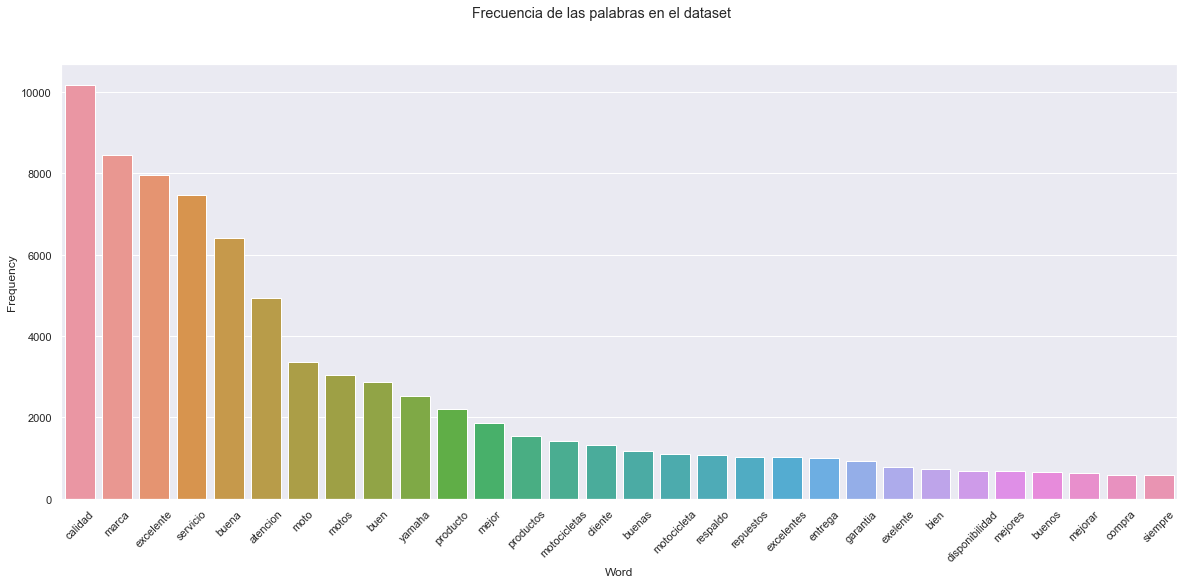

In [ ]:
plt.figure(figsize = (20,8))
plot = sns.barplot(x  = df_freq_reviews_text.iloc[:30].Word, y = df_freq_reviews_text.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(45)
plt.suptitle('Frecuencia de las palabras en el dataset')
plt.show()

In [ ]:
# Importamos esta libreria que nos permite reemplzar caracteres

import re
from nltk.stem import SnowballStemmer
# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer (pasar a la raiz de la palabra)

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
#stemmer = SnowballStemmer('spanish')

# Traemos nuevamente las stopwords

stopwords = nltk.corpus.stopwords.words('spanish')

In [ ]:
stopwords

In [ ]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno

review_list=[]
for review in df.Comentario: 
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    review=re.sub("[^a-zA-Z]"," ",str(review))
    # Pasamos todo a minúsculas
    review=review.lower()
    # Tokenizamos para separar las palabras del review
    review=nltk.word_tokenize(review)
    # Eliminamos las palabras de menos de 3 letras
    review = [palabra for palabra in review if len(palabra)>3]
    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    review=[stemmer.stem(palabra) for palabra in review]
    # Por ultimo volvemos a unir el review
    review=" ".join(review)
    
    # Vamos armando una lista con todos los reviewes
    review_list.append(review)
    #data_reviews["review_normalizado"] = review_list

In [ ]:
df["review_stem"] = review_list
df.tail()

Tienda  NoPersonal  ModeloMoto Fecha_Rpta_Encuesta  Valor_NPS  \
40084    39.0      1717.0        13.0          2021-12-09          9   
40085   385.0       746.0        53.0          2021-12-09         10   
40086   235.0       202.0        13.0          2021-12-09          8   
40087   175.0        -1.0        29.0          2021-12-09         10   
40088    63.0      1319.0         8.0          2021-12-09         10   

       Tasa_Retorno Fecha_Venta_Servicio  \
40084           NaN           2021-08-27   
40085           NaN           2021-08-25   
40086           NaN           2021-08-28   
40087           1.0           2021-08-19   
40088           NaN           2021-08-20   

                                              Comentario Motivo_Retorno  \
40084  la marca es una de las mejores, no se que tal ...            NaN   
40085                   la mejor maquina y los repuesto             NaN   
40086  informacion clara sobre la llegada de nuevos m...            NaN   
40087  excelente servicio . y lo excelente que salen ...            NaN   
40088  la amabilidad de sus funcionarios y demas pers...            NaN   

       Nombre_Encuesta_bin  Tiempo encuesta (days)  \
40084                    0                     104   
40085                    0                     106   
40086                    0                     103   
40087                    1                     112   
40088                    0                     111   

                                             review_stem  
40084  marca mejor servicio post venta deben mejorar ...  
40085                             mejor maquina repuesto  
40086             informacion clara llegada nuevo modelo  
40087          excelent servicio excelent salen producto  
40088  amabilidad funcionario dema person conforman r...

In [ ]:
df.review_stem.unique()

array(['perfecto detal revisar nivel atencion client',
       'moto buena servicio venta deficient',
       'falta confiabilidad rapido sistema inyeccion', ...,
       'informacion clara llegada nuevo modelo',
       'excelent servicio excelent salen producto',
       'amabilidad funcionario dema person conforman rivera florez'],
      dtype=object)

In [ ]:
filtrar = []
if True:
    filtrar.append("o")
    filtrar.append("ahi")
    filtrar.append("algo")
    filtrar.append("alguno")
    filtrar.append("alguna")
    filtrar.append("antes")
    filtrar.append("aqui")
    filtrar.append("asi")
    filtrar.append("ayer")
    filtrar.append("aproximadamente")
    filtrar.append("arriba")
    filtrar.append("atras")
    filtrar.append("aun")
    filtrar.append("aunque")
    filtrar.append("bajo")
    filtrar.append("bastante")
    filtrar.append("como")
    filtrar.append("con")
    filtrar.append("casi")
    filtrar.append("cual")
    filtrar.append("desde")
    filtrar.append("despues")
    filtrar.append("desde")
    filtrar.append("dice")
    filtrar.append("dicen")
    filtrar.append("dijo")
    filtrar.append("dio")
    filtrar.append("donde")
    filtrar.append("ella")
    filtrar.append("emplean")
    filtrar.append("entonces")
    filtrar.append("eran")
    filtrar.append("eras")
    filtrar.append("eres")
    filtrar.append("es")
    filtrar.append("t")
    filtrar.append("T")
    filtrar.append("esa")
    filtrar.append("esas")
    filtrar.append("esos")
    filtrar.append("esta")
    filtrar.append("estaban")
    filtrar.append("estoy")
    filtrar.append("estuvo")
    filtrar.append("fue")
    filtrar.append("fuera")
    filtrar.append("fueron")
    filtrar.append("haber")
    filtrar.append("habian")
    filtrar.append("hace")
    filtrar.append("hacen")
    filtrar.append("haces")
    filtrar.append("hay")
    filtrar.append("haya")
    filtrar.append("he")
    filtrar.append("hemos")
    filtrar.append("hicieron")
    filtrar.append("hizo")
    filtrar.append("incluso")
    filtrar.append("ir")
    filtrar.append("junto")
    filtrar.append("lado")
    filtrar.append("los")
    filtrar.append("luego")
    filtrar.append("lugar")
    filtrar.append("manera")
    filtrar.append("me")
    filtrar.append("mas")
    filtrar.append("ni")
    filtrar.append("nos")
    filtrar.append("para")
    filtrar.append("por")
    filtrar.append("quien")
    filtrar.append("quiere")
    filtrar.append("sea")
    filtrar.append("sean")
    filtrar.append("ser")
    filtrar.append("sera")
    filtrar.append("si")
    filtrar.append("sin")
    filtrar.append("sobre")
    filtrar.append("soy")
    filtrar.append("sus")
    filtrar.append("tan")
    filtrar.append("tenia")
    filtrar.append("toda")
    filtrar.append("un")
    filtrar.append("unas")
    filtrar.append("usted")
    filtrar.append("va")
    filtrar.append("pos")
    filtrar.append("4")
    filtrar.append("2")
    filtrar.append("500")
    filtrar.append("esten")
    filtrar.append("1")
    filtrar.append("2")
    filtrar.append("3")
    filtrar.append("5")
    filtrar.append("6")
    filtrar.append("7")
    filtrar.append("8")
    filtrar.append("9")
    filtrar.append("10")
    filtrar.append("30")
    filtrar.append("60")
    filtrar.append("63")
    filtrar.append("sz")
    filtrar.append("q") 

# data_reviews Completo

data_reviews_review_stem = []
for i in range(df.shape[0]):
    review = df.iloc[i].review_stem
    review = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    review = [word for word in review if word not in stopwords]
    review = [word for word in review if word not in filtrar]

    data_reviews_review_stem.append(review)

In [ ]:
type(data_reviews_review_stem)

list

In [ ]:
len(data_reviews_review_stem)

40089

In [ ]:
data_reviews_review_stem[0]

['perfecto', 'detal', 'revisar', 'nivel', 'atencion', 'client']

In [ ]:
list(itertools.chain('ABC', 'DEF')) 

['A', 'B', 'C', 'D', 'E', 'F']

In [ ]:
data_reviews_review_stem = list(itertools.chain(*data_reviews_review_stem))
data_reviews_review_stem[0:10]

['perfecto',
 'detal',
 'revisar',
 'nivel',
 'atencion',
 'client',
 'moto',
 'buena',
 'servicio',
 'venta']

In [ ]:
freq_data_reviews_review_stem = nltk.FreqDist(data_reviews_review_stem)
freq_data_reviews_review_stem

FreqDist({'calidad': 10182, 'excelent': 8988, 'marca': 8823, 'servicio': 7894, 'buena': 7587, 'moto': 6398, 'atencion': 4949, 'producto': 3754, 'buen': 2885, 'mejor': 2548, ...})

In [ ]:
df_freq_reviews_review_stem = pd.DataFrame(list(freq_data_reviews_review_stem.items()), columns = ["Word","Frequency"])
df_freq_reviews_review_stem.head()

Word  Frequency
0  perfecto         63
1     detal        155
2   revisar         54
3     nivel        155
4  atencion       4949

In [ ]:
df_freq_reviews_review_stem.sort_values('Frequency',ascending=False, inplace = True)
df_freq_reviews_review_stem.head()

Word  Frequency
32   calidad      10182
16  excelent       8988
24     marca       8823
8   servicio       7894
7      buena       7587

In [ ]:
df_freq_reviews_review_stem.reset_index(drop = True, inplace=True)
df_freq_reviews_review_stem.head()

Word  Frequency
0   calidad      10182
1  excelent       8988
2     marca       8823
3  servicio       7894
4     buena       7587

#### Palabras con steming

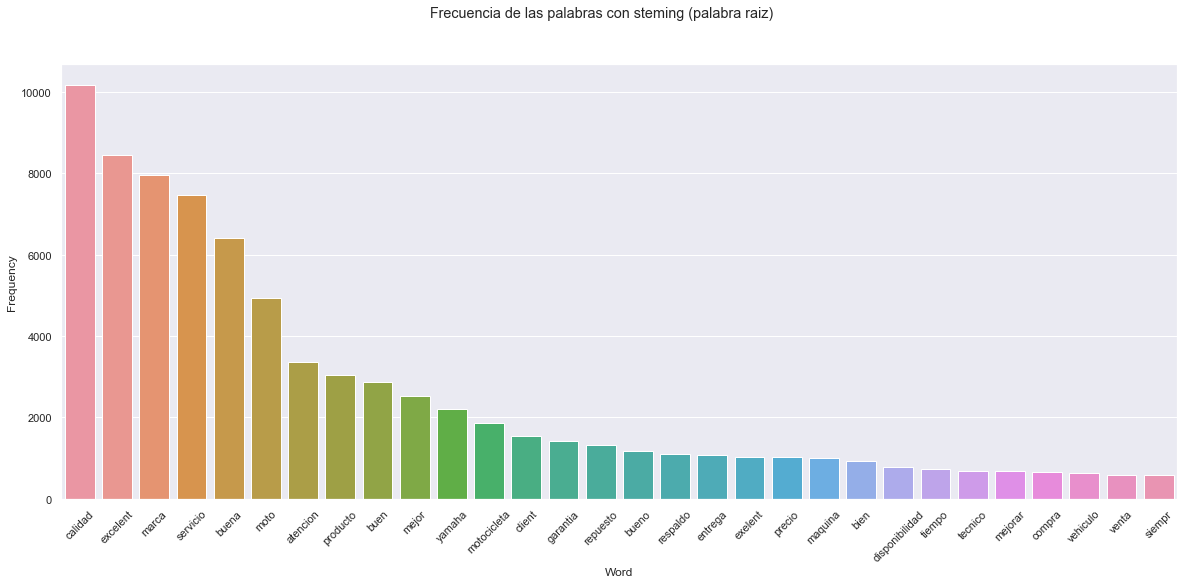

In [ ]:
plt.figure(figsize = (20,8))
plot = sns.barplot(x  = df_freq_reviews_review_stem.iloc[:30].Word, y = df_freq_reviews_text.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(45)
plt.suptitle('Frecuencia de las palabras con steming (palabra raiz)')
plt.show()

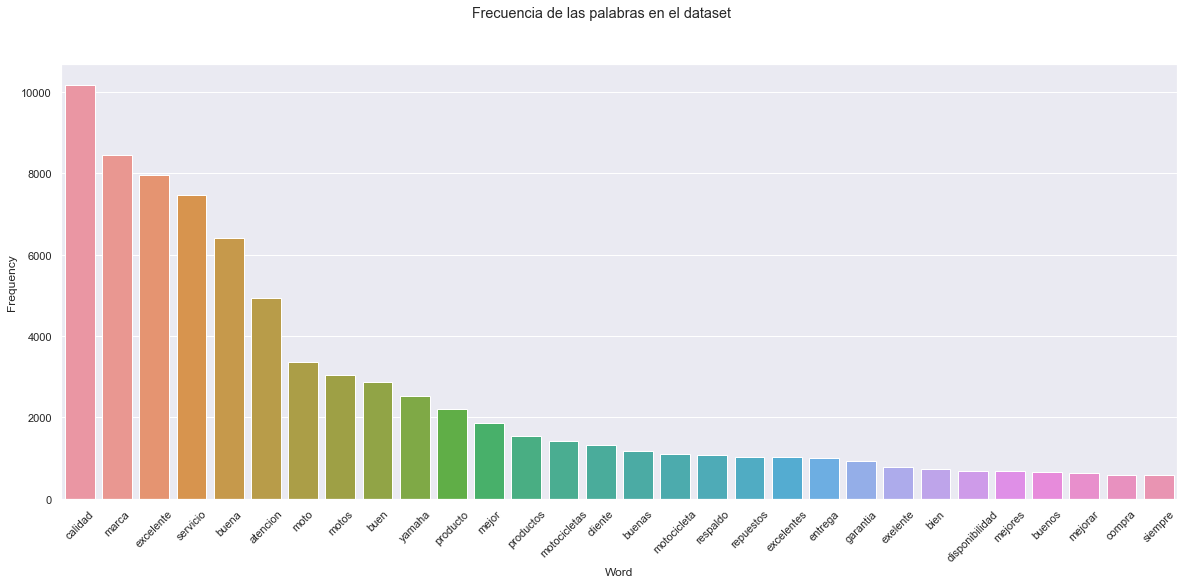

In [ ]:
plt.figure(figsize = (20,8))
plot = sns.barplot(x  = df_freq_reviews_text.iloc[:30].Word, y = df_freq_reviews_text.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(45)
plt.suptitle('Frecuencia de las palabras en el dataset')
plt.show()

**Vamos a redefinir nuestra variable Valor_NPS entre 0 y 1 para determinar una relacion.**

In [ ]:
df1=df.copy()

In [ ]:
df1['Valor_NPS'] = np.where(df1['Valor_NPS']>=10, 1, 0)

In [ ]:
df1

Tienda  NoPersonal  ModeloMoto Fecha_Rpta_Encuesta  Valor_NPS  \
0       432.0      1866.0        38.0          2019-01-03          0   
1       107.0      1768.0        60.0          2019-01-03          0   
2       129.0      1619.0        16.0          2019-01-03          0   
3       434.0      1845.0         1.0          2019-01-04          1   
4        90.0       621.0        67.0          2019-01-04          0   
...       ...         ...         ...                 ...        ...   
40084    39.0      1717.0        13.0          2021-12-09          0   
40085   385.0       746.0        53.0          2021-12-09          1   
40086   235.0       202.0        13.0          2021-12-09          0   
40087   175.0        -1.0        29.0          2021-12-09          1   
40088    63.0      1319.0         8.0          2021-12-09          1   

       Tasa_Retorno Fecha_Venta_Servicio  \
0               NaN           2019-01-15   
1               1.0           2019-01-14   
2               1.0           2019-01-24   
3               NaN           2019-09-02   
4               NaN           2019-12-02   
...             ...                  ...   
40084           NaN           2021-08-27   
40085           NaN           2021-08-25   
40086           NaN           2021-08-28   
40087           1.0           2021-08-19   
40088           NaN           2021-08-20   

                                              Comentario Motivo_Retorno  \
0      no todo es perfecto hay detalles que tienen qu...            NaN   
1      la moto son buenas, pero los servicios pos-ven...            NaN   
2      la falta de confiabilidad, y un daño muy rapid...            NaN   
3                         excelente atencion y asesoria             NaN   
4               mas accesorio para incentivar al cliente            NaN   
...                                                  ...            ...   
40084  la marca es una de las mejores, no se que tal ...            NaN   
40085                   la mejor maquina y los repuesto             NaN   
40086  informacion clara sobre la llegada de nuevos m...            NaN   
40087  excelente servicio . y lo excelente que salen ...            NaN   
40088  la amabilidad de sus funcionarios y demas pers...            NaN   

       Nombre_Encuesta_bin  Tiempo encuesta (days)  \
0                        0                      12   
1                        1                      11   
2                        1                      21   
3                        0                     241   
4                        0                     332   
...                    ...                     ...   
40084                    0                     104   
40085                    0                     106   
40086                    0                     103   
40087                    1                     112   
40088                    0                     111   

                                             review_stem  
0           perfecto detal revisar nivel atencion client  
1                    moto buena servicio venta deficient  
2           falta confiabilidad rapido sistema inyeccion  
3                             excelent atencion asesoria  
4                            accesorio incentivar client  
...                                                  ...  
40084  marca mejor servicio post venta deben mejorar ...  
40085                             mejor maquina repuesto  
40086             informacion clara llegada nuevo modelo  
40087          excelent servicio excelent salen producto  
40088  amabilidad funcionario dema person conforman r...  

[40089 rows x 12 columns]

In [ ]:
df1.Valor_NPS.unique()

array([0, 1])

**No se puede realizar lemmatizacion ya que no hay una libreria en español**

## Modelos

In [ ]:
data_reviews_nlp = df1["Valor_NPS"] 

In [ ]:
# Tomamso la lista de palabras y el vector que nos dice que valor de found funny tiene el review

list_reviews = list(df1['review_stem'].values)
nps = df1['Valor_NPS'].values

from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

matriz_reviews = cou_vec.fit_transform(list_reviews)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 primeras palabras mas usadas: ",all_words[0:50])

50 primeras palabras mas usadas:  ['acabado', 'acces', 'accesibilidad', 'acceso', 'accesoria', 'accesorio', 'aceit', 'aceitar', 'acerca', 'acesor', 'acompa', 'acord', 'actitud', 'actual', 'actualment', 'acuerdo', 'adecuada', 'adecuado', 'adelant', 'adema', 'adicion', 'adicional', 'adquiri', 'adquirida', 'adquirido', 'adquirir', 'adquisicion', 'agencia', 'agil', 'agilidad', 'agilizar', 'agrad', 'agregado', 'agua', 'ahora', 'ahorro', 'ajust', 'alguien', 'algun', 'alguna', 'alla', 'alli', 'almacen', 'almeno', 'alta', 'alto', 'amabilidad', 'amabl', 'ambient', 'amiento']


C:\Users\pulzara\miniconda3\envs\sp3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



### Modelo bayesiano

In [ ]:
x = matriz_reviews.toarray()
y = nps

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["no me gusta","si me gusta"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error 

nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtrain,ytrain))
print("acc : ", nb.score(xtest,ytest))

acc :  0.6998222693399021
acc :  0.6925667248690447


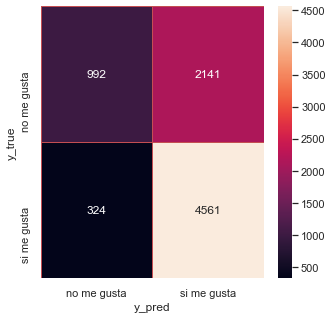

In [ ]:
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)

**Quiere decir que de las personas que les gusta, predice 4561 correctamente y 324 incorrectamente.**

**Las personas que no les gusta predice bien 992 y 2141 incorrectamente.**

In [ ]:
y_train_pred = nb.predict(xtrain)
y_test_pred = nb.predict(xtest)
print(mean_squared_error(ytrain, y_train_pred))
print(mean_squared_error(ytest, y_test_pred))

0.3001777306600979
0.30743327513095536


*Las dimensiones de nuestro dataset son de 0 a 1, asi que un error de 0.3 no esta tan mal.*

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.7545522574208032


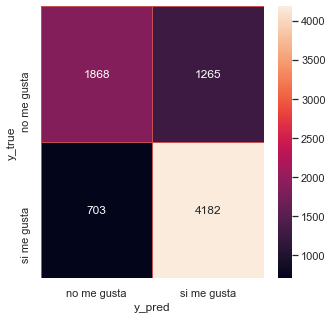

In [ ]:
y_pred=rf.predict(xtest)
confusion(ytest,y_pred)

**Quiere decir que de las personas que les gusta, predice 4182 correctamente y 703 incorrectamente.**

**Las personas que no les gusta predice bien 1265 y 1868 incorrectamente.**

In [ ]:
y_train_pred = rf.predict(xtrain)
y_test_pred = rf.predict(xtest)
print(mean_squared_error(ytrain, y_train_pred))
print(mean_squared_error(ytest, y_test_pred))

0.14000187084905366
0.2454477425791968


**El error RMSE disminuye considerablemente. Pareciera que subestima un poco los datos**

In [ ]:
data_reviews_nlp.value_counts()

1    24426
0    15663
Name: Valor_NPS, dtype: int64

C:\Users\pulzara\miniconda3\envs\sp3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\pulzara\miniconda3\envs\sp3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



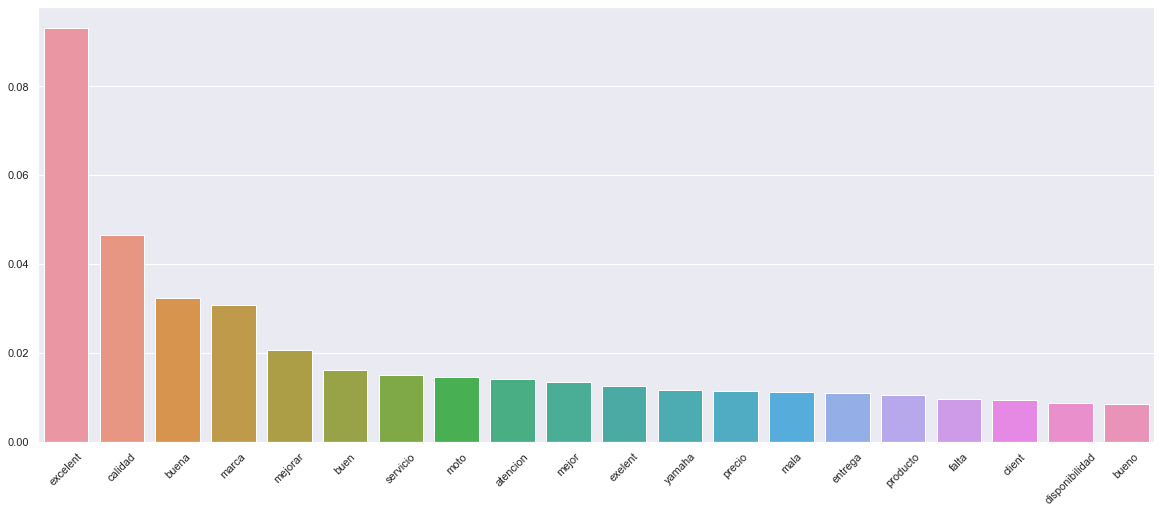

In [ ]:
# Le preguntamos la importancia de cada feature (cada palabra)

importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (20,8))
sns.barplot(selected_columns, selected_importances)
plt.xticks(rotation=45)
plt.show()

**Para este caso, un comentario positivo realmente se traduce en un NPS alto. Sin embargo, es posible determinar que palabras como disponibilidad, falta, cliente, mala , precio traducen en una mala calificacion.**

## sistemas de recomendacion (analisis de sentimientos)

In [ ]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 3.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630080 sha256=a6a3eed4f24ab5beda35d47b1843bda84bffb4fff63b3104a73ce47aa250ea11
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
from surprise import SVD

In [ ]:
df2 = data2.copy()

In [ ]:
df2.head(3)

Tienda  NoPersonal  ModeloMoto Fecha_Rpta_Encuesta  Valor_NPS  \
0   432.0      1863.0        18.0          2020-05-30         10   
1   387.0      1443.0        60.0          2020-05-27          9   
2    71.0      1486.0        60.0          2020-05-27          9   

   Tasa_Retorno Fecha_Venta_Servicio  \
0           NaN           2020-03-17   
1           NaN           2020-11-05   
2           NaN           2020-12-05   

                                          Comentario Motivo_Retorno  \
0                                         excelente             NaN   
1                               buenas motocicletas             NaN   
2  excelente marca,buen posicionamiento en el mer...            NaN   

   Nombre_Encuesta_bin  
0                    0  
1                    0  
2                    0

In [ ]:
df2 = df2.drop(['Tienda','Fecha_Rpta_Encuesta','Tasa_Retorno','Tasa_Retorno','Motivo_Retorno','Nombre_Encuesta_bin','Fecha_Venta_Servicio', 'Comentario'], axis=1)
df2.head(3)

NoPersonal  ModeloMoto  Valor_NPS
0      1863.0        18.0         10
1      1443.0        60.0          9
2      1486.0        60.0          9

In [ ]:
df2["ModeloMoto"] = df2["ModeloMoto"].astype(int)
df2["NoPersonal"] = df2["NoPersonal"].astype(int)
df2 = df2.sort_values('NoPersonal', ascending=False)
#df2["Valor_NPS"] = df2["Valor_NPS"].astype(int)
df2=df2.reset_index(drop=True)
df2.head(3)

NoPersonal  ModeloMoto  Valor_NPS
0        1890          77          9
1        1890          77         10
2        1890           1         10

In [ ]:
df3 = data2.copy()
df3.shape

(40089, 10)

In [ ]:
df3 = df3.drop(['Tienda','Fecha_Rpta_Encuesta','Tasa_Retorno','Tasa_Retorno','Motivo_Retorno','Nombre_Encuesta_bin','Fecha_Venta_Servicio', "NoPersonal", "Valor_NPS"], axis=1)
df3["ModeloMoto"] = df3["ModeloMoto"].astype(int)

df3.head(4)

ModeloMoto                                         Comentario
0          18                                         excelente 
1          60                               buenas motocicletas 
2          60  excelente marca,buen posicionamiento en el mer...
3          67         es la marca que es numero uno del mercado

In [ ]:
df3["Comentario"].drop_duplicates(inplace=True) 

In [ ]:
df3 = df3.sort_values("ModeloMoto", ascending=True) 
df3

ModeloMoto                                         Comentario
3379            0                                   el buen servicio
24190           0  disponibilidad de repuestos para motocicletas ...
28854           0                       calidad servicio y asesoria 
17800           0                               calidad de las motos
19207           0        excelentes productos y servicio al cliente 
...           ...                                                ...
32794          79  mala servicio, al darme salida con una moto au...
31105          79                                          excelente
15388          79                                            calidad
10816          79                        atencion rapida y eficiente
6858           79  la excelente marca q es, y la excelente atenci...

[40089 rows x 2 columns]

### Modelo Sistema de recomendacion svd
**Predecimos**

In [ ]:
reader = Reader(rating_scale=(0,10))
Data = Dataset.load_from_df(df2[['NoPersonal', 'ModeloMoto', 'Valor_NPS']], reader)
trainset, testset = train_test_split(Data, test_size=.25) 
algo = SVD(n_factors=5, n_epochs=20, lr_all=0.005, reg_all=0.002)
algo.fit(trainset)
predictions = algo.test(testset)

In [ ]:
usuario = 20
df_user = df2[(df2['NoPersonal'] == usuario)]
df_user = df_user.reset_index(drop=True)

recomendaciones_usuario = df3[['Comentario','ModeloMoto']].iloc[:40089].copy() 
recomendaciones_usuario = recomendaciones_usuario.sort_values("ModeloMoto", ascending=False)
recomendaciones_usuario.index = recomendaciones_usuario.ModeloMoto 
recomendaciones_usuario = recomendaciones_usuario.drop(['ModeloMoto'], axis=1)

recomendaciones_usuario.head(10) 
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(40089, 1)


Comentario
ModeloMoto                                                   
79          la excelente marca q es, y la excelente atenci...
79          mala servicio, al darme salida con una moto au...
79                                                      todos
79                                                    precios
79          precios mas economicos, mas capacitacion para ...

In [ ]:
usuario_vistas = df2[['NoPersonal', 'ModeloMoto', 'Valor_NPS']][df2['NoPersonal'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(17, 3)


NoPersonal  ModeloMoto  Valor_NPS
36713          20          61         10
36714          20          38          8
36715          20          13          5
36716          20          21         10
36717          20          18         10

In [ ]:
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

ModeloMoto                                         Comentario
0          79  la excelente marca q es, y la excelente atenci...
1          79  mala servicio, al darme salida con una moto au...
2          79                                              todos
3          79                                            precios
4          79  precios mas economicos, mas capacitacion para ...

In [ ]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['ModeloMoto'].apply(lambda x: algo.predict(usuario, x).est)
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
recomendaciones_usuario.head(10) 

ModeloMoto                                         Comentario  \
6332          61  calidad en sus productos y su servicio en el p...   
4659          61                                            calidad   
4666          61  bajar un poquitos los precios de accesorios, y...   
4665          61  los productos son de excelente calidad y fiabi...   
4664          61  mala atencion y muchos dias de espera para la ...   
4663          61  excelente atencion al cliente y calidad de veh...   
4662          61                  x buenos motores fueras y estilos   
4661          61  disponibilidad de productos y mayor seriedad e...   
4660          61  marca confiable, con respaldo, calidad en los ...   
4658          61                   calidad, estilos y confiabilidad   

      Estimate_Score  
6332            10.0  
4659            10.0  
4666            10.0  
4665            10.0  
4664            10.0  
4663            10.0  
4662            10.0  
4661            10.0  
4660            10.0  
4658            10.0

**Se predice el numero del personal con mejor comentario y el modelo de la moto correspondiente**

In [ ]:
rmse_valor_NPS = accuracy.rmse(predictions)

accuracy.rmse(predictions)

RMSE: 1.9167
RMSE: 1.9167


1.916696306746007

In [ ]:
from surprise.model_selection import cross_validate

rmse_test_means = []
factores = [1,2,4,8,16,32,64,125,256]

for factor in factores:
    print(f'\nNumero de factores: {factor}')
    algo = SVD(n_factors=factor)
    cv = cross_validate(algo, Data, measures=['RMSE'], cv = 5, verbose=True) 
    rmse_test_means.append(np.mean(cv['test_rmse']))


Numero de factores: 1
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.8361  1.8271  1.7850  1.8481  1.8959  1.8384  0.0357  
Fit time          0.33    0.28    0.27    0.29    0.30    0.29    0.02    
Test time         0.03    0.03    0.03    0.03    0.02    0.03    0.01    

Numero de factores: 2
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.8260  1.7888  1.8260  1.9119  1.8823  1.8470  0.0441  
Fit time          0.27    0.26    0.26    0.27    0.27    0.26    0.00    
Test time         0.03    0.03    0.03    0.03    0.03    0.03    0.00    

Numero de factores: 4
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.8306  1.8796  1.8686  1.8482  1.9018  1.8658  0.0247  
Fit time          0.29    0.33    

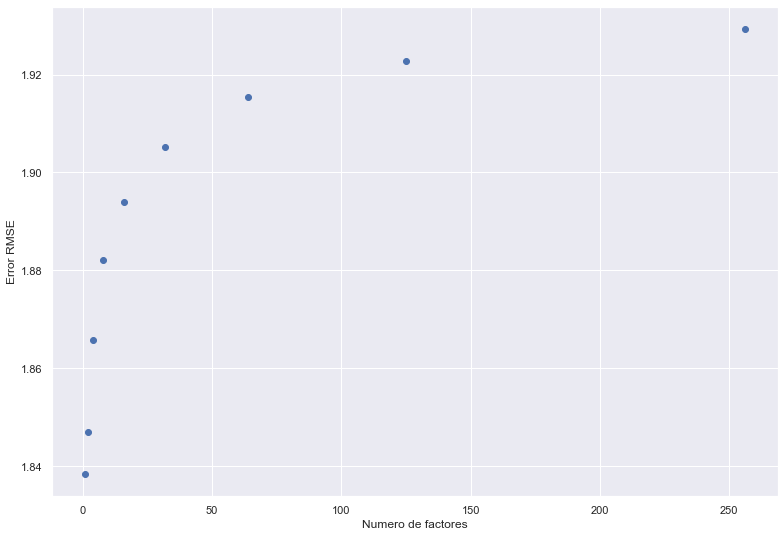

In [ ]:
plt.figure(figsize=(13,9))
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [0,1],'n_epochs': [5], 'lr_all': [20],
              'reg_all': [0.01,0.005]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(Data) 


In [ ]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

2.088284565566471
{'n_factors': 0, 'n_epochs': 5, 'lr_all': 20, 'reg_all': 0.01}


### Otro modelo sistema de recomendacion 2 - svd

Ahora escogeremos tienda como userID, para predecir los valores de NPS con mayor puntuacion con el ID del modelo de moto.

In [ ]:
df4 = data2.copy()
df4 = df4.drop(['NoPersonal','Fecha_Rpta_Encuesta','Tasa_Retorno','Tasa_Retorno','Motivo_Retorno','Nombre_Encuesta_bin','Fecha_Venta_Servicio', 'Comentario'], axis=1)
print(df4.shape)
df4 = df4.dropna()
print(df4.shape)

reader = Reader(rating_scale=(1, 100))
Data1 = Dataset.load_from_df(df4[['Tienda', 'ModeloMoto', 'Valor_NPS']], reader)
trainset, testset = train_test_split(Data1, test_size=0.25)
algo = SVD(n_factors=5, n_epochs=20, lr_all=0.005, reg_all=0.002)
algo.fit(trainset)
predictions = algo.test(testset)

(40089, 3)
(40089, 3)


In [ ]:
rmse_metascore = accuracy.rmse(predictions)

accuracy.rmse(predictions)

RMSE: 1.8392
RMSE: 1.8392


1.8391681128703008

**En este caso la metrica da muy similar al modelo anterior. Asi que las variables podrian tener el mismo peso vs el target.**

In [ ]:
usuario = 200
df_user = df2[(df2['NoPersonal'] == usuario)]
df_user = df_user.reset_index(drop=True)

recomendaciones_usuario = df3[['Comentario','ModeloMoto']].iloc[:40089].copy() 
recomendaciones_usuario = recomendaciones_usuario.sort_values("ModeloMoto", ascending=False)
recomendaciones_usuario.index = recomendaciones_usuario.ModeloMoto 
recomendaciones_usuario = recomendaciones_usuario.drop(['ModeloMoto'], axis=1)

recomendaciones_usuario.head(10) 
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(40089, 1)


Comentario
ModeloMoto                                                   
79          la excelente marca q es, y la excelente atenci...
79          mala servicio, al darme salida con una moto au...
79                                                      todos
79                                                    precios
79          precios mas economicos, mas capacitacion para ...

In [ ]:
usuario_vistas = df4[['Tienda', 'ModeloMoto', 'Valor_NPS']][df4['Tienda'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(44, 3)


Tienda  ModeloMoto  Valor_NPS
5102    200.0        67.0         10
6916    200.0         7.0          5
6945    200.0        67.0         10
7306    200.0        60.0         10
12351   200.0         7.0          9

In [ ]:
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

ModeloMoto                                         Comentario
0          79  la excelente marca q es, y la excelente atenci...
1          79  mala servicio, al darme salida con una moto au...
2          79                                              todos
3          79                                            precios
4          79  precios mas economicos, mas capacitacion para ...

In [ ]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['ModeloMoto'].apply(lambda x: algo.predict(usuario, x).est)
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
recomendaciones_usuario.head(10) 

ModeloMoto                                         Comentario  \
3567          67                                    disponibilidad    
2726          67                                  excelente marcas    
2719          67  mejorar atencion en el punto de venta repuesto...   
2720          67                       es una marca muy reconocida    
2721          67                                   muy buena marca    
2722          67  mejorar y dar mayor informacion, ser mas trans...   
2723          67                                          muy bueno   
2724          67                        la calidad de los productos   
2725          67                        mejorar el servicio tecnico   
2727          67                           la eficacia de la marca.   

      Estimate_Score  
3567        9.996828  
2726        9.996828  
2719        9.996828  
2720        9.996828  
2721        9.996828  
2722        9.996828  
2723        9.996828  
2724        9.996828  
2725        9.996828  
2727        9.996828

Para una ID tienda de 200 se obtienen los siguientes scores y modelos de motos. Es posible detemrinar los comentarios positivos hacia la tienda. Es importante  identificar los sarcasmos como los signos de interrogacion, que pueden significar malos comentarios. 

## Random forest 

In [ ]:
x1 = data2.drop(['Valor_NPS','Motivo_Retorno','Comentario', 'Fecha_Rpta_Encuesta', 'Fecha_Rpta_Encuesta','Tasa_Retorno','Fecha_Venta_Servicio'], axis=1)
y1 = data2[['Valor_NPS']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=50, max_features='sqrt', oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

C:\Users\pulzara\miniconda3\envs\sp3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\pulzara\miniconda3\envs\sp3\lib\site-packages\sklearn\base.py:446: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



RandomForestRegressor(max_features='sqrt', n_estimators=50, oob_score=True,
                      random_state=42)

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

1.9486643667776034
3.8013406755988544


C:\Users\pulzara\miniconda3\envs\sp3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show(close=None, block=None)>

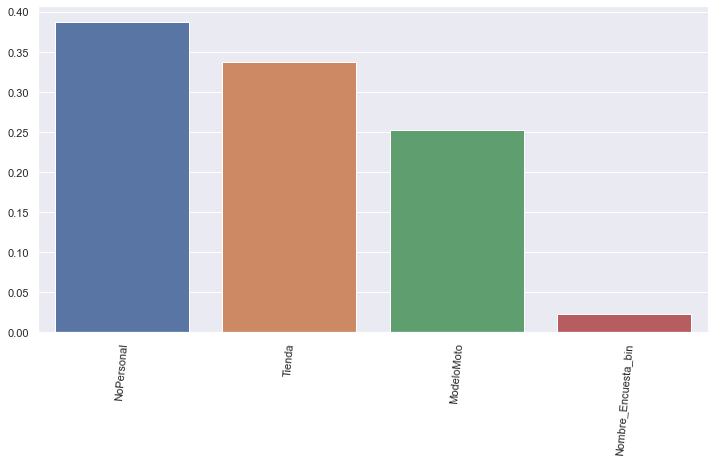

In [ ]:
importances = clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (12,6))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=85)
plt.show

*La variable que menos peso tiene en el modelo es nombre_encuesta_bin*

**Al parecer un random forest no predice muy bien la variable Valor_NPS.**

## Conclusion


El modelo de analisis de sistemas de recomendacion, nos da una metrica de RMSE mas baja que random forest. Es posible determinar que tipo NoPersonal obtendra una mayor calificacion o rating, con un ID de motocicleta especifico.En el caso de la prediccion se observa que se repiten varias motocicletas, ya que los comentarios pueden repetirse en diferentes id de motos, sin embargo la calificacion es acorde al texto. 
Se concluye de este modelo que los NoPersonal si influyen en la experiencia positiva del cliente al ahora de commprar y de obtener un servicio. 

| Modelo | Sistema de recomendacion | 
| --- | --- |
| RMSE | 1.9374 |



Se realizaron algunas optimizaciones del modelo, sin embargo el modelo mas simple dio mejor resultado. La metrica de RMSE utilizando cross validation y grid_search fue de:

| Modelo | Sistema de recomendacion (cross validation y gridsearch)| 
| --- | --- |
| RMSE | 2.08834 |


El segundo modelo de sistema de recomendacion se basa en sustituir la variable NoPersonal por Tienda, para identiciar los scores con los respectivos ID de motos. En este caso la metrica de evaluacion no da muy lejana al modelo anterior, sin embargo es 0.1 menor. Esto se traduce en que el peso de las variables tienda y NoPersonal influyen o afectan casi en la misma magnitud.  
Con un RMSE:

| Modelo | Sistema de recomendacion 2 | 
| --- | --- |
| RMSE | 1.8283 |

En modelo de lenguaje natural, fue posible realizar un analsiis de los comentarios y determinar que tipos de comentarios seran positivos y cuales negativos. La mayor frecuencia de palabras son: calidad, marca, excelente,servicio, buena, atencion. La metrica de evaluacion:

| Modelo | Procesamiento Lenguaje natural | 
| --- | --- |
| RMSE train | 0.30017 |
| RMSE test | 0.30743 |

Se observa que los valores no estan muy alejados para el entrenamiento y el testeo a la hora de predecir la variable.
La metrica accuracy, nos da cuenta del porcentaje de elementos clasificados correctamente.

| Modelo | Procesamiento de Lenguaje natural | 
| --- | --- |
| acc train | 0.69982 |
| acc test | 0.69256 |

Se evidencia que es uno de los mejores modelo hasta ahora que predice mejor la variable de valor_NPS, la cual dependera mucho de los comentarios que los clientes realicen. 

Por otro lado el modelo de random forest utilizando las mismas variables de lenguaje natural, se ve que el modelo se ajusta un poco mas a los datos.
La metrica de accuracy evidencia un incremento en la clasificacion:

| Modelo | Procesamiento de Lenguaje natural | 
| --- | --- |
| acc test | 0.7545522 |

La metrica RMSE da como resultado:

| Modelo | Procesamiento de Lenguaje natural | 
| --- | --- |
| RMSE train | 0.140001 |
| RMSE test | 0.245447 |


**Trabajo a futuro**

Queda mucho por realizar en este dataset, ademas de implementar otros modelos como KNN, realizar la imputacion de los datos de manera diferente, usando otra distribucion. Es posible analizar un poco mas afondo los residuos de los modelos para entender un poco mas el comportamiento de nuestras variables. Por ultimo, se pdria seguir buscando esos hiperparametros optimos que maximicen mi modelo. 
Cabe resaltar que las variables de entrada poco pueden explicar el comportamiento de nuestro target. Una solucion para esto podria ser obteniendo mas data, o obtener nuevas variables que se correlacionen con valores mayores a 0.5. Sin esto, dificilmente se podria implementar modelos eficientes. 
